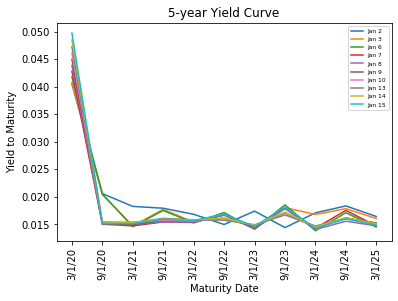

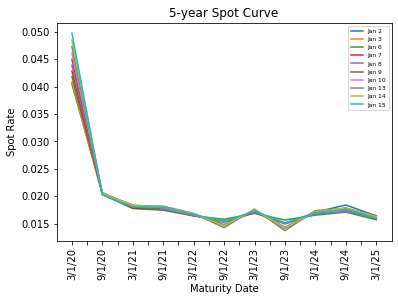

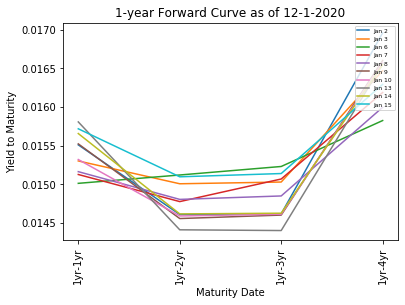

[[3.13397854e-05 4.05120057e-04 1.70249686e-04 3.71408091e-04
  1.38159644e-05]
 [4.05120057e-04 5.54791444e-03 2.27090340e-03 5.00806612e-03
  2.75982431e-04]
 [1.70249686e-04 2.27090340e-03 1.00870836e-03 2.14692323e-03
  2.79601861e-04]
 [3.71408091e-04 5.00806612e-03 2.14692323e-03 4.65423888e-03
  4.30186274e-04]
 [1.38159644e-05 2.75982431e-04 2.79601861e-04 4.30186274e-04
  4.54119337e-03]]
[1.11731515e-02 4.50198303e-03 1.01576690e-04 1.44180316e-06
 5.24178722e-06]
[[-0.05149537  0.00761853  0.00462438 -0.99734348 -0.05074226]
 [-0.69963818  0.08447081 -0.67562848  0.04442029 -0.21195305]
 [-0.29531992 -0.00149381  0.55311718  0.05732752 -0.7768905 ]
 [-0.64318455  0.0372899   0.48577011  0.00569354  0.59069289]
 [-0.08339324 -0.99569768 -0.03991933 -0.00373547  0.00491814]]
[[ 0.00029953 -0.00019318 -0.0002086   0.00027027]
 [-0.00019318  0.00035977  0.00034168 -0.0003264 ]
 [-0.0002086   0.00034168  0.00038288 -0.00030116]
 [ 0.00027027 -0.0003264  -0.00030116  0.00056911]]


In [11]:
import numpy as np
from numpy import linalg as ev
import math
import matplotlib.pyplot as plt

class bond:
   def __init__(self, ten_day_price, maturity_time, coupon):
      # a list of the ten-day price
      self.ten_day_price = ten_day_price
      # how many days from Jan 2, 2020 to the maturity date
      self.maturity_time = maturity_time
      self.coupon = coupon

ten_day_2020_3_1 = [99.85, 99.86, 99.86, 99.86, 99.86, 99.86, 99.86, 99.86, 99.86, 99.86]
bond_2020_3_1 = bond(ten_day_2020_3_1, 59, 0.75)

ten_day_2020_9_1 = [99.26, 99.28, 99.28, 99.27, 99.28, 99.28, 99.28, 99.27, 99.28, 99.30]
bond_2020_9_1 = bond(ten_day_2020_9_1, 243, 0.375)

ten_day_2021_3_1 = [98.89, 98.93, 98.95, 98.94, 98.92, 98.92, 98.88, 98.90, 98.90, 98.93]
bond_2021_3_1 = bond(ten_day_2021_3_1, 424, 0.375)

ten_day_2021_9_1 = [98.41, 98.45, 98.49, 98.46, 98.46, 98.43, 98.43, 98.38, 98.41, 98.42]
bond_2021_9_1 = bond(ten_day_2021_9_1, 608, 0.375)

ten_day_2022_3_1 = [97.57, 97.63, 97.66, 97.65, 97.64, 97.60, 97.61, 97.57, 97.58, 97.61]
bond_2022_3_1 = bond(ten_day_2022_3_1, 789, 0.25)

ten_day_2022_6_1 = [102.51, 102.47, 102.46, 102.52, 102.52, 102.58, 102.59, 102.62, 102.59, 102.53]
bond_2022_6_1 = bond(ten_day_2022_6_1, 881, 1.375)

ten_day_2023_3_1 = [100.31, 100.42, 100.48, 100.45, 100.44, 100.35, 100.31, 100.27, 100.31, 100.38]
bond_2023_3_1 = bond(ten_day_2023_3_1, 1154, 0.875)

ten_day_2023_6_1 = [99.56, 99.49, 99.44, 99.53, 99.54, 99.62, 99.61, 99.65, 99.59, 99.48]
bond_2023_6_1 = bond(ten_day_2023_6_1, 1246, 0.75)

ten_day_2024_3_1 = [102.52, 102.65, 102.75, 102.58, 102.68, 102.53, 102.47, 102.46, 102.54, 102.64]
bond_2024_3_1 = bond(ten_day_2024_3_1, 1520, 1.125)

ten_day_2024_9_1 = [98.72, 98.95, 99.29, 99.11, 99.25, 98.99, 99.03, 99.06, 98.99, 99.10]
bond_2024_9_1 = bond(ten_day_2024_9_1, 1704, 0.75)

ten_day_2025_3_1 = [98.24, 98.43, 98.58, 98.48, 98.48, 98.30, 98.25, 98.24, 98.34, 98.47]
bond_2025_3_1 = bond(ten_day_2025_3_1, 1885, 0.625)

bonds_list = [bond_2020_3_1, bond_2020_9_1, bond_2021_3_1, bond_2021_9_1, bond_2022_3_1, bond_2022_6_1, bond_2023_3_1, bond_2023_6_1, bond_2024_3_1, bond_2024_9_1, bond_2025_3_1]

def calculate_present_value(bond, day):
   # calculate the dirty price for this bond
   dirty_price = bond.coupon * 2 * (59 - day) / 365
   present_value = round(dirty_price + bond.ten_day_price[day], 6)
   return present_value

# use a new list to store the ten bonds with dirty price
pv_b_list=[]
for b in bonds_list:
   ten_day_dirtyprice=[]
   day=0
   for clean_price in b.ten_day_price:
      ten_day_dirtyprice.append(calculate_present_value(b,day))
      day += 1
   pv_b_list.append(bond(ten_day_dirtyprice, b.maturity_time, b.coupon))

# calculate the present value using the nominal ytm
def pv(bond, ytm, day):
   condition = bond.maturity_time - day
   coupon = bond.coupon
   pv = (coupon + 100) * math.exp((-condition/365)*ytm)
   # assume 182.5 days is half year
   condition -= 182.5
   while condition > 58:
      pv += coupon * math.exp((-condition/365)*ytm)
      condition -= 182.5
   return pv

# input a bond, return a list of ytm of ten days
def cal_ytm(bond):
   ytm_list = []
   price_list = bond.ten_day_price
   day = 0
   for price in price_list:
      # try ytm from 0.05
      ytm = 0.05
      condition = pv(bond, ytm, day)
      # modify ytm with a loop
      while condition < price:
         ytm -= 0.000001
         condition = pv(bond, ytm, day)
      day += 1
      ytm_list.append(ytm)
   return ytm_list

# use a list of lists to store all YTMs
bond_ytm_list = []
for bond in pv_b_list:
   bond_ytm_list.append(cal_ytm(bond))

# store ytm by date rather than bonds
ytm_day_list = []
ytm_day_list2 = []
for i in range(10):
   day_list = []
   for j in range(11):
      day_list.append(bond_ytm_list[j][i])
   ytm_day_list.append(day_list)
   # estimate 9/1/22 & 9/1/23
   day_list[5] = day_list[5]*2-day_list[4]
   day_list[7] = day_list[7]*2-day_list[6]
   ytm_day_list2.append(day_list)

dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('Maturity Date')
plt.ylabel('Yield to Maturity')
plt.title('5-year Yield Curve')
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10],labels = ['3/1/20','9/1/20','3/1/21','9/1/21','3/1/22','9/1/22','3/1/23','9/1/23','3/1/24','9/1/24','3/1/25'], rotation= 'vertical')
for i in range(10):
    plt.plot(ytm_day_list2[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.show()

price_day_list = []
for i in range(10):
   day_list = []
   for j in range(11):
      day_list.append(pv_b_list[j].ten_day_price[i])
   price_day_list.append(day_list)

coupon_list = []
for bond in pv_b_list:
   coupon_list.append(bond.coupon)

def helper(spot_list, coupon, condition, day):
   s = 0
   # if condition is true, then the spot list is mar_sep
   if condition:
      day = 59 - day
   else:
      day = 151 - day
   for spot in spot_list:
      s += coupon * math.exp(-spot * (day/365))
      day += 182.5
   return s

spot_day_list = []
for i in range (10):
   mar_sep = []
   jun_dec = []
   spot_list = []
   # zero coupon bond spot=ytm
   mar_sep.append(ytm_day_list[i][0])
   spot = math.log((price_day_list[i][1]-helper(mar_sep, coupon_list[1], True, i))/(100+coupon_list[1]))/(-243/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[0]+mar_sep[1])/2)
   spot = math.log((price_day_list[i][2]-helper(mar_sep, coupon_list[2], True, i))/(100+coupon_list[2]))/(-424/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[1]+mar_sep[2])/2)
   spot = math.log((price_day_list[i][3]-helper(mar_sep, coupon_list[3], True, i))/(100+coupon_list[3]))/(-608/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[2]+mar_sep[3])/2)
   spot = math.log((price_day_list[i][4]-helper(mar_sep, coupon_list[4], True, i))/(100+coupon_list[4]))/(-789/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[3]+mar_sep[4])/2)
   spot = math.log((price_day_list[i][5]-helper(jun_dec, coupon_list[5], False, i))/(100+coupon_list[5]))/(-881/365)
   jun_dec.append(spot)
   mar_sep.append(jun_dec[-1]*2-mar_sep[-1])
   spot = math.log((price_day_list[i][6]-helper(mar_sep, coupon_list[6], True, i))/(100+coupon_list[6]))/(-1154/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[-1]+mar_sep[-2])/2)
   spot = math.log((price_day_list[i][7]-helper(jun_dec, coupon_list[7], False, i))/(100+coupon_list[7]))/(-1246/365)
   jun_dec.append(spot)
   mar_sep.append(jun_dec[-1]*2-mar_sep[-1])
   spot = math.log((price_day_list[i][8]-helper(mar_sep, coupon_list[8], True, i))/(100+coupon_list[8]))/(-1520/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[-1]+mar_sep[-2])/2)
   spot = math.log((price_day_list[i][9]-helper(mar_sep, coupon_list[9], True, i))/(100+coupon_list[9]))/(-1704/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[-1]+mar_sep[-2])/2)
   spot = math.log((price_day_list[i][10]-helper(mar_sep, coupon_list[10], True, i))/(100+coupon_list[10]))/(-1885/365)
   mar_sep.append(spot)
   jun_dec.append((mar_sep[-1]+mar_sep[-2])/2)
   for j in range(10):
      spot_list.append(mar_sep[j])
      spot_list.append(jun_dec[j])
   spot_list.append(mar_sep[10])
   spot_day_list.append(spot_list)

dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('Maturity Date')
plt.ylabel('Spot Rate')
plt.title('5-year Spot Curve')
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],labels = ['3/1/20','','9/1/20','','3/1/21','','9/1/21','','3/1/22','','9/1/22','','3/1/23','','9/1/23','','3/1/24','','9/1/24','','3/1/25'], rotation = 'vertical')
for i in range(10):
    plt.plot(spot_day_list[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.show()

forward_day_list = []
i = 0
for spot_list in spot_day_list:
    forward_list = []
    r1 = spot_list[3]
    r2 = spot_list[7]
    r3 = spot_list[11]
    r4 = spot_list[15]
    r5 = spot_list[19]
    day = 334 - i
    forward_list.append((r2*(day+365)-r1*day)/365)
    forward_list.append((r3*(day+2*365)-r1*day)/(365*2))
    forward_list.append((r4*(day+3*365)-r1*day)/(365*3))
    forward_list.append((r5*(day+4*365)-r1*day)/(365*4))
    forward_day_list.append(forward_list)
    i += 1

dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('Maturity Date')
plt.ylabel('Yield to Maturity')
plt.title('1-year Forward Curve as of 12-1-2020')
plt.xticks(ticks = [0, 1, 2, 3, 4],labels = ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'], rotation = 'vertical')
for i in range(10):
    plt.plot(forward_day_list[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.show()


ytm_ts_matrix = np.zeros((5,9))
for i in range(5):
   for j in range(9):
      ytm_ts_matrix[i][j] = round(math.log(bond_ytm_list[i*2][j+1]/bond_ytm_list[i*2][j]),6)
ytm_cov_matrix = np.cov(ytm_ts_matrix)
print(ytm_cov_matrix)

ytm_evalue, ytm_evector = ev.eig(ytm_cov_matrix)
print(ytm_evalue)
print(ytm_evector)

forward_matrix = np.array(forward_day_list).transpose()
forward_ts_matrix = np.zeros((4,9))
for i in range(4):
   for j in range(9):
      forward_ts_matrix[i][j] = round(math.log(forward_matrix[i][j+1]/forward_matrix[i][j]),6)
forward_cov_matrix = np.cov(forward_ts_matrix)
print(forward_cov_matrix)

forward_evalue, forward_evector = ev.eig(forward_cov_matrix)
print(forward_evalue)
print(forward_evector)